In [15]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
(x_train,y_train), (_, _) = mnist. load_data()
x_train=x_train[:3000]
y_train=y_train[:3000]
x_mnist = reshape(x_train, [x_train.shape[0], x_train. shape[1]*x_train.shape[2]])

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.002s...
[t-SNE] Computed neighbors for 3000 samples in 0.903s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 44.272037
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.524506
[t-SNE] KL divergence after 1000 iterations: 1.136376


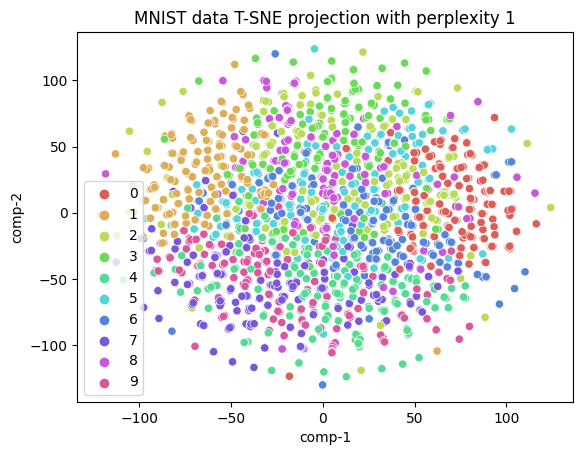

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.002s...
[t-SNE] Computed neighbors for 3000 samples in 0.589s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 402.354304
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.027634
[t-SNE] KL divergence after 1000 iterations: 1.355973


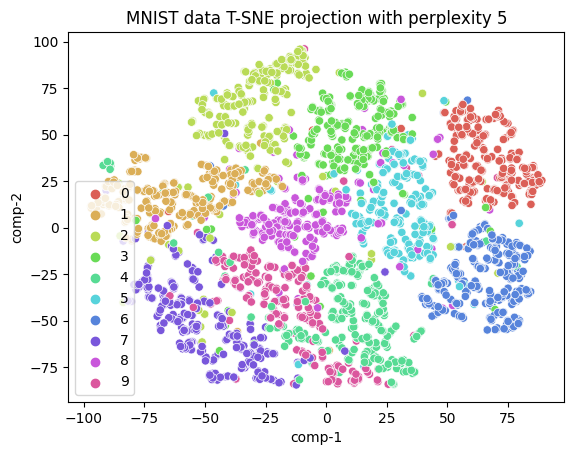

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.002s...
[t-SNE] Computed neighbors for 3000 samples in 0.950s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 488.922457
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.559494
[t-SNE] KL divergence after 1000 iterations: 1.374157


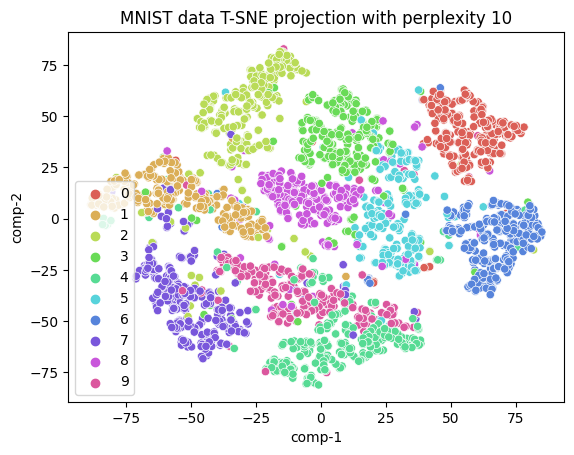

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.003s...
[t-SNE] Computed neighbors for 3000 samples in 0.636s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 638.347373
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.400497
[t-SNE] KL divergence after 1000 iterations: 1.246762


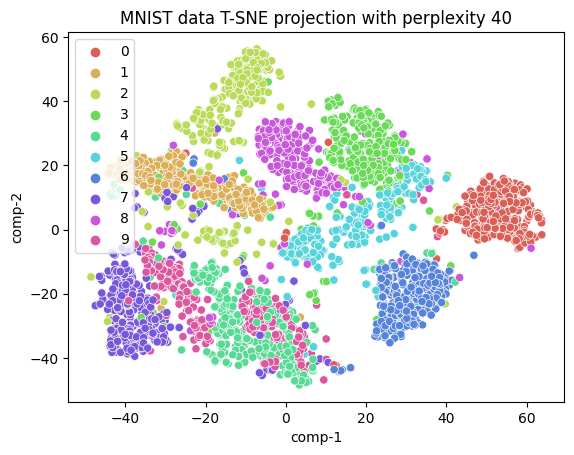

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.006s...
[t-SNE] Computed neighbors for 3000 samples in 0.668s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 662.163342
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.816193
[t-SNE] KL divergence after 1000 iterations: 1.214167


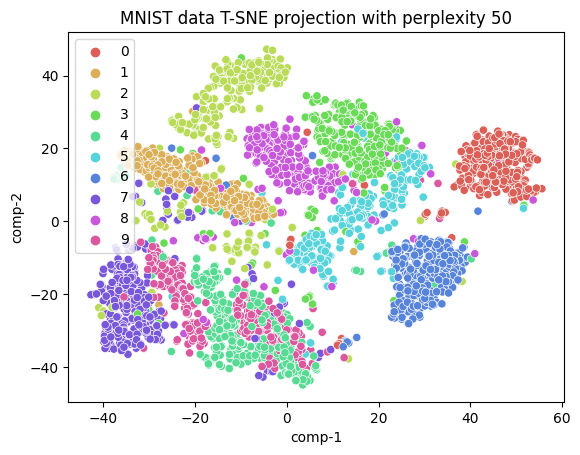

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.002s...
[t-SNE] Computed neighbors for 3000 samples in 0.768s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 736.435972
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.553078
[t-SNE] KL divergence after 1000 iterations: 1.097241


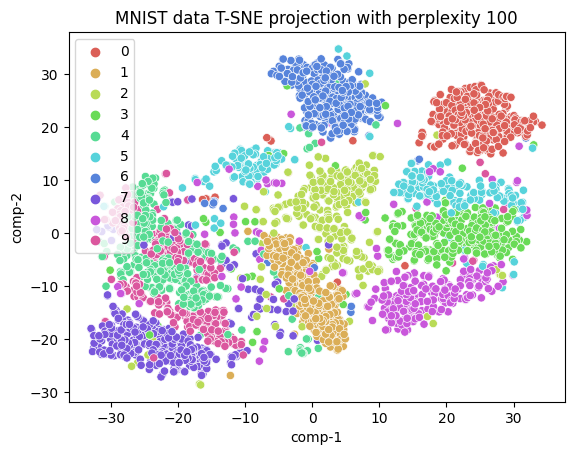

In [12]:
for p in [1, 5, 10, 40, 50, 100]:
  tsne = TSNE(n_components=2, verbose=1, random_state=123, perplexity=p)
  z = tsne.fit_transform(x_mnist)
  df = pd.DataFrame()
  df["y"] = y_train
  df["comp-1"] = z[:,0]
  df["comp-2"] = z[:,1]

  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                  palette=sns.color_palette("hls", 10),
                  data=df).set(title="MNIST data T-SNE projection with perplexity "+str(p))
  plt.show()

[Text(0.5, 1.0, 'MNIST data PCA projection')]

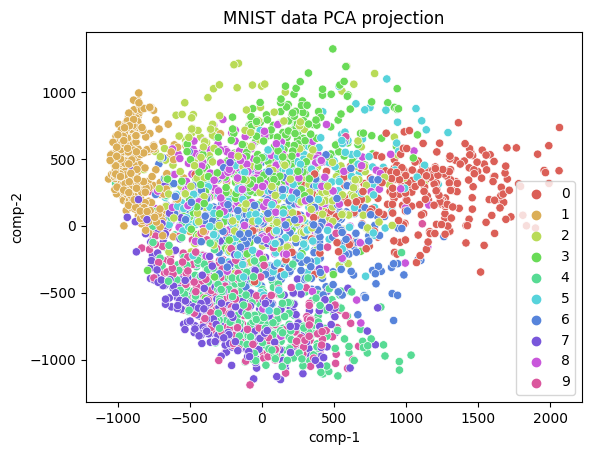

In [8]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
z = pca.fit_transform(x_mnist)
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data PCA projection")

In [16]:
!pip install umap-learn
!pip install datashader bokeh holoviews scikit-image colorcet

[Text(0.5, 1.0, 'MNIST data UMAP projection')]

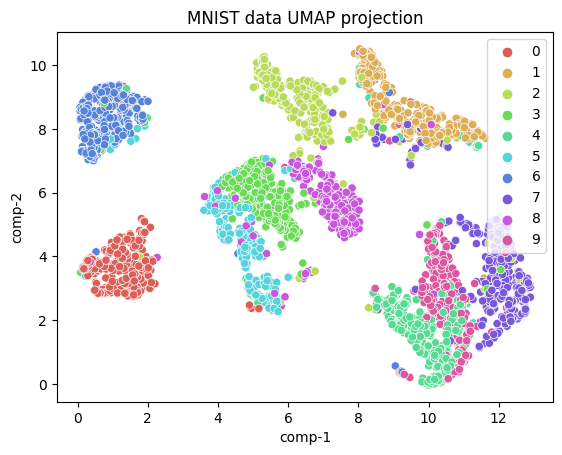

In [20]:
from keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
from umap import UMAP
import umap.plot
import datashader as ds
import datashader.utils as utils
import datashader.transfer_functions as tf

z=UMAP(random_state=1000).fit_transform(x_mnist)
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data UMAP projection")

### Lab

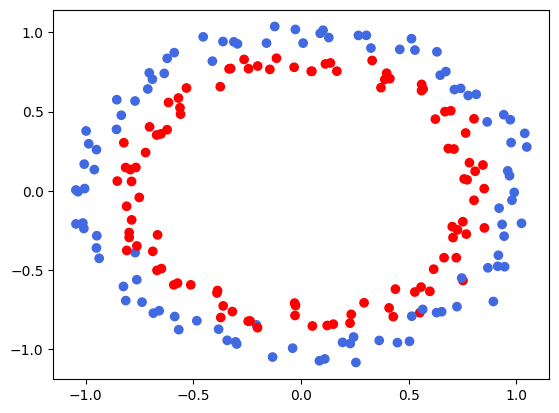

In [49]:
from sklearn.datasets import make_circles
x, y=make_circles(n_samples=200, noise=0.05)

colors=['royalblue', 'red', 'maroon']
veccol=np.vectorize(lambda x: colors[x%len(colors)])
plt.scatter(x[:, 0], x[:, 1], c=veccol(y))

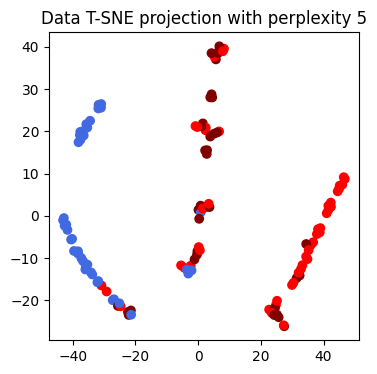

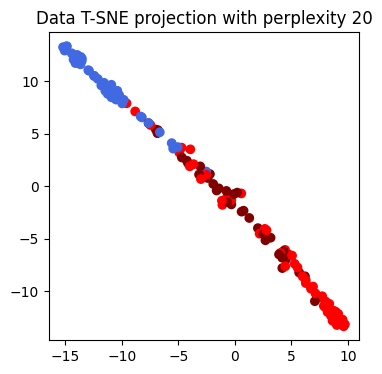

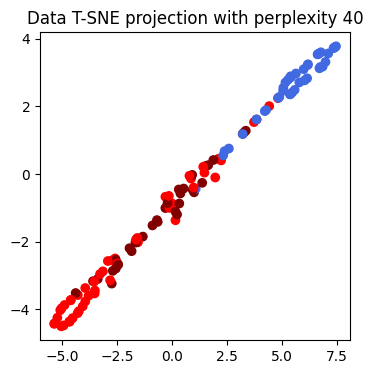

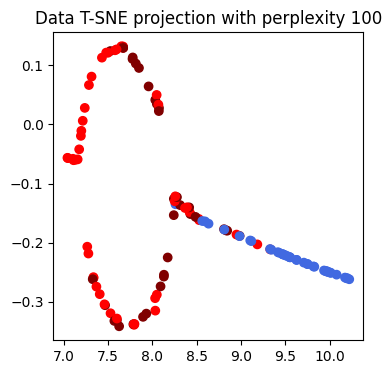

In [94]:
for p in [5, 20, 40, 100]:
  tsne = TSNE(n_components=2, random_state=42, perplexity=p)
  z = tsne.fit_transform(x_train)
  df = pd.DataFrame()
  df["y"] = y_train
  df["comp-1"] = z[:,0]
  df["comp-2"] = z[:,1]

  plt.figure(figsize=(4, 4))
  plt.scatter(x="comp-1", y="comp-2", c=veccol(y_train), data=df)
  plt.gca().set_title("Data T-SNE projection with perplexity "+str(p))
plt.show()

Text(0.5, 0, '$x_3$')

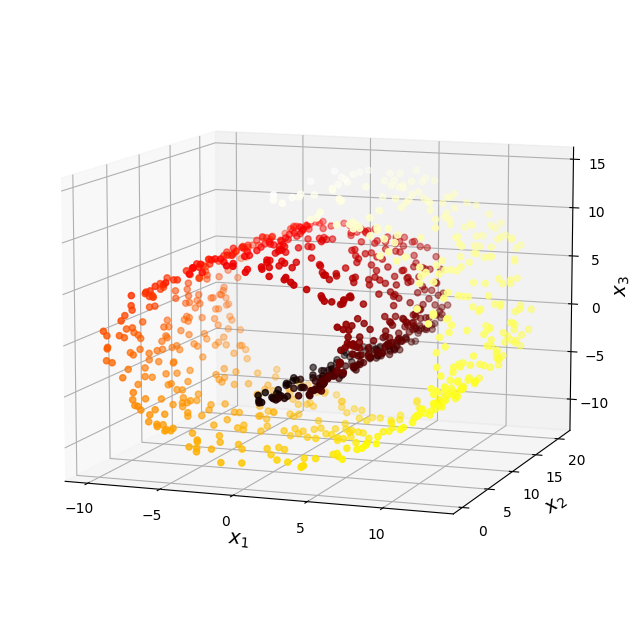

In [76]:
from sklearn.datasets import make_swiss_roll
x, y=make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
fig = plt.figure(figsize = (10,8))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
ax.set_zlabel("$x_3$", fontsize=14)

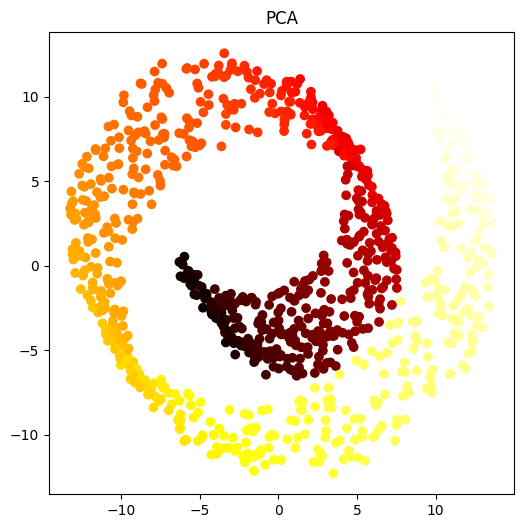

In [71]:
pca=PCA(n_components=2)
z = pca.fit_transform(x)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
fig = plt.figure(figsize = (6,6))
plt.scatter(df["comp-1"], df["comp-2"], c=y, cmap=plt.cm.hot)
ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
plt.gca().set_title("PCA")
plt.show()

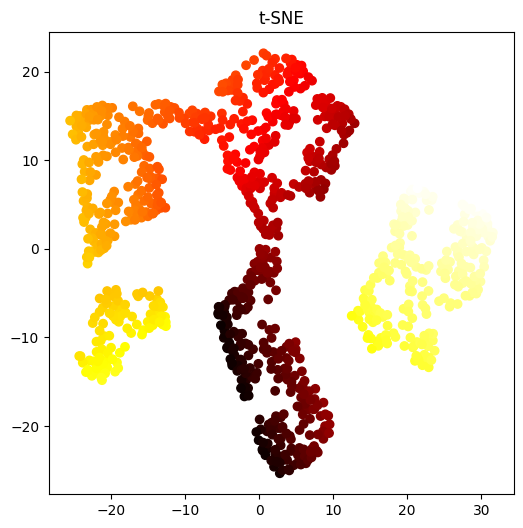

In [77]:
tsne=TSNE(n_components=2, random_state=42, perplexity=50)
z = tsne.fit_transform(x)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
fig = plt.figure(figsize = (6,6))
plt.scatter(df["comp-1"], df["comp-2"], c=y, cmap=plt.cm.hot)
ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
plt.gca().set_title("t-SNE")
plt.show()

<ipython-input-82-dee7682992ac>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df["comp-1"], df["comp-2"], c=veccol(y_train), cmap=plt.cm.hot)


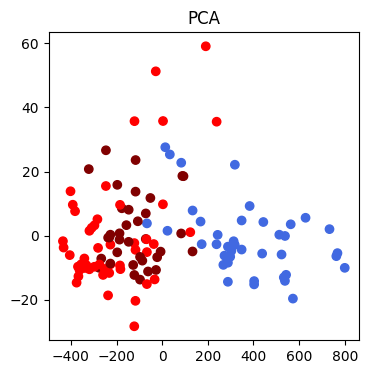

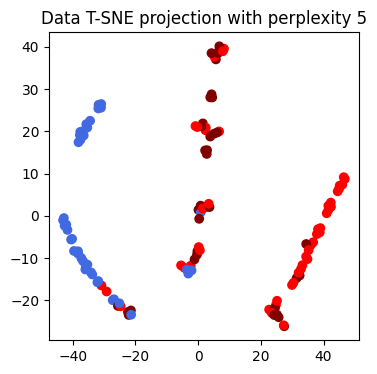

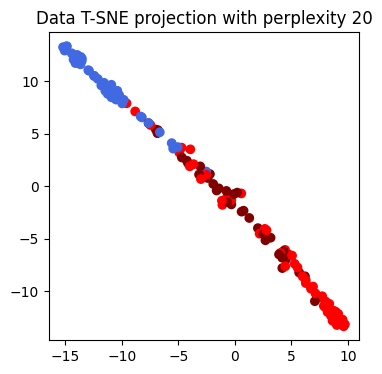

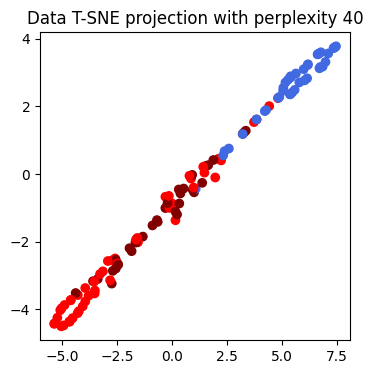

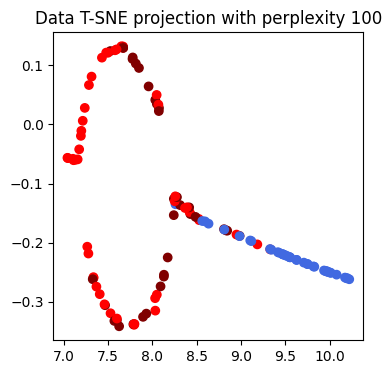

In [82]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

x=load_wine()['data']
y=load_wine()['target']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=0)

pca=PCA(n_components=2)
z = pca.fit_transform(x_train)
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
fig = plt.figure(figsize = (4, 4))
plt.scatter(df["comp-1"], df["comp-2"], c=veccol(y_train), cmap=plt.cm.hot)
plt.gca().set_title("PCA")
plt.show()

for p in [5, 20, 40, 100]:
  tsne = TSNE(n_components=2, random_state=42, perplexity=p)
  z = tsne.fit_transform(x_train)
  df = pd.DataFrame()
  df["y"] = y_train
  df["comp-1"] = z[:,0]
  df["comp-2"] = z[:,1]

  plt.figure(figsize=(4, 4))
  plt.scatter(x="comp-1", y="comp-2", c=veccol(y_train), data=df)
  plt.gca().set_title("Data T-SNE projection with perplexity "+str(p))
plt.show()

<ipython-input-86-700b913c3779>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df["comp-1"], df["comp-2"], c=veccol(y_train), cmap=plt.cm.hot)


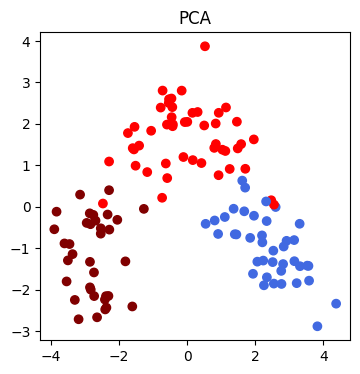

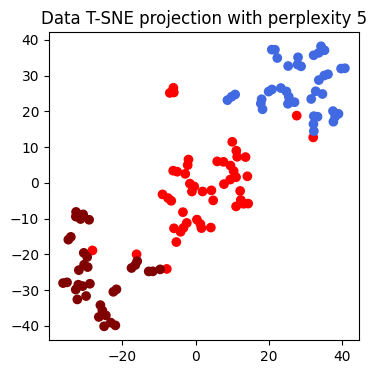

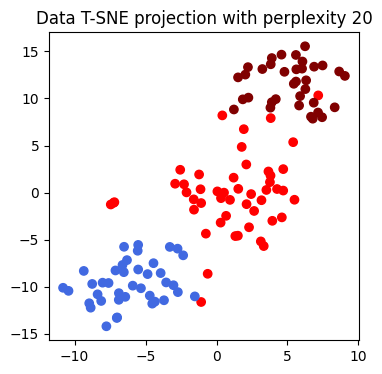

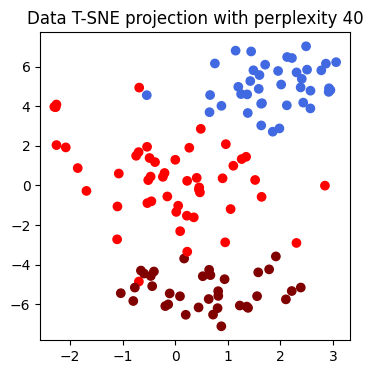

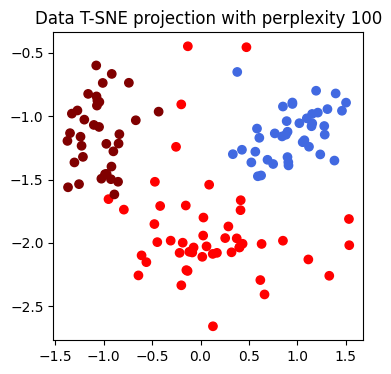

In [86]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xsc=sc.fit_transform(x_train)

pca=PCA(n_components=2)
z = pca.fit_transform(xsc)
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
fig = plt.figure(figsize = (4, 4))
plt.scatter(df["comp-1"], df["comp-2"], c=veccol(y_train), cmap=plt.cm.hot)
plt.gca().set_title("PCA")
plt.show()

for p in [5, 20, 40, 100]:
  tsne = TSNE(n_components=2, random_state=42, perplexity=p)
  z = tsne.fit_transform(xsc)
  df = pd.DataFrame()
  df["y"] = y_train
  df["comp-1"] = z[:,0]
  df["comp-2"] = z[:,1]

  plt.figure(figsize=(4, 4))
  plt.scatter(x="comp-1", y="comp-2", c=veccol(y_train), data=df)
  plt.gca().set_title("Data T-SNE projection with perplexity "+str(p))
plt.show()